In [97]:
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [106]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
classification_problem = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [100]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

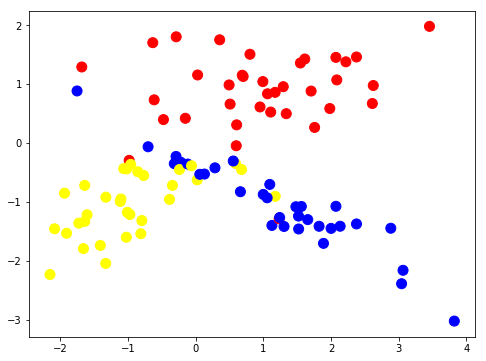

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)
plt.show()

In [102]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [103]:
def plot_decision_surface(k, train_data, train_labels):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    estimator.fit(train_data, train_labels)
    
    #plot decision surface on the train data 
    plt.subplot(3,3,k)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title("k = " + str(k))

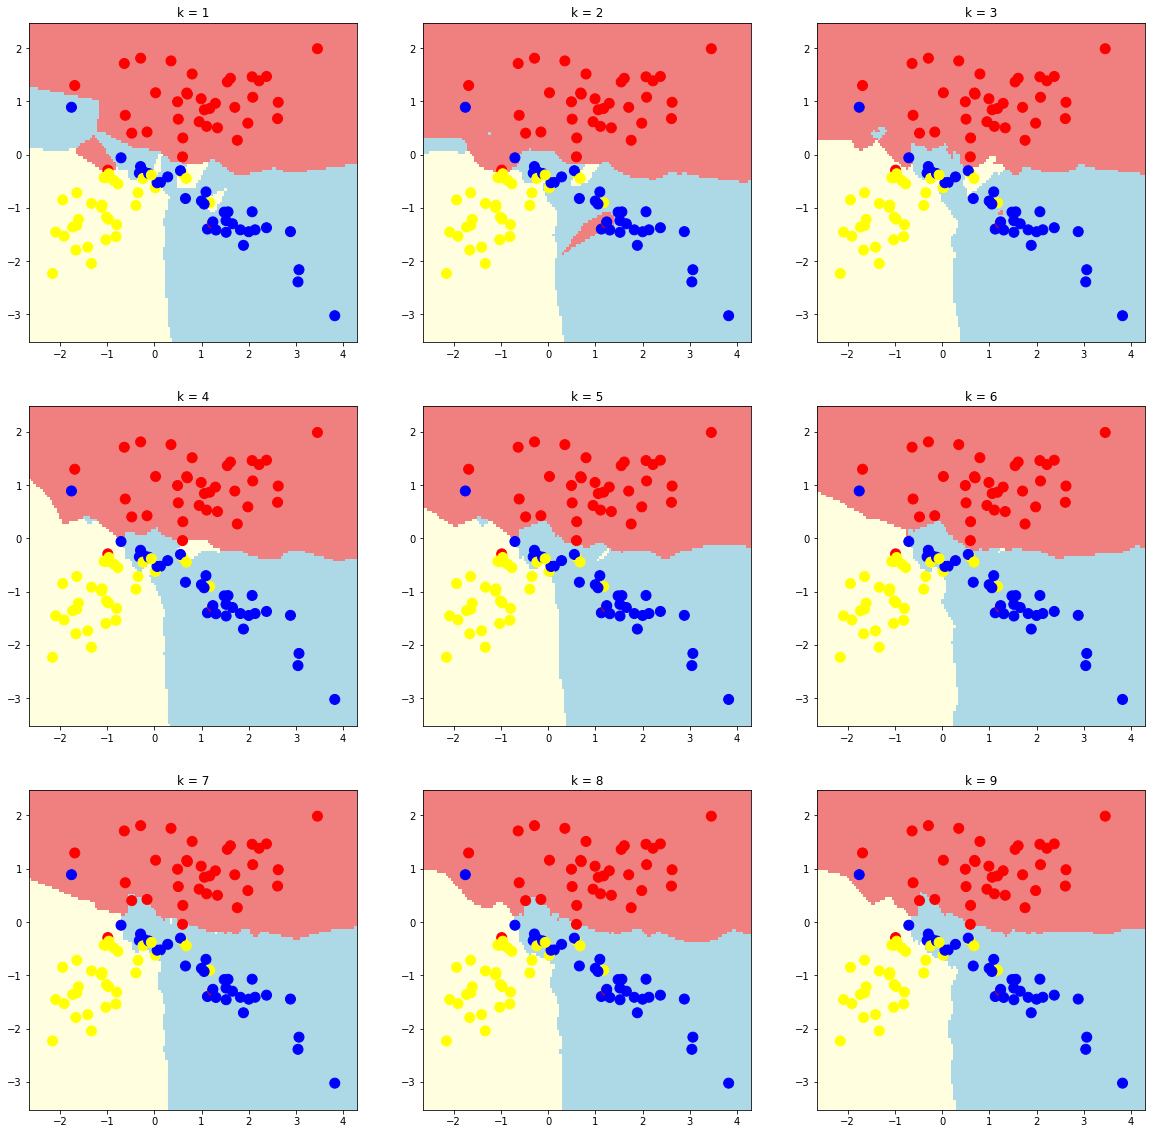

In [104]:
plt.figure(figsize = (20, 20))
for k in np.arange(1, 10):
    plot_decision_surface(k, classification_problem[0], classification_problem[1])
plt.show()

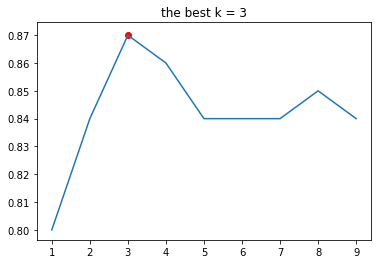

In [105]:
k = 1
accuracy = []
for k in np.arange(1, 10):
    accuracy_k = []
    for train_indices, test_indices in cross_validation.KFold(len(classification_problem[0]), n_folds = 5):
        train_data = classification_problem[0][train_indices]
        train_labels = classification_problem[1][train_indices]
        test_data = classification_problem[0][test_indices]
        test_labels = classification_problem[1][test_indices]

        estimator = neighbors.KNeighborsClassifier(n_neighbors=k)

        estimator.fit(train_data, train_labels)

        predictions = estimator.predict(test_data)
        accuracy_k.append(metrics.accuracy_score(test_labels, predictions))
    accuracy.append(np.array(accuracy_k).mean())

max_accuracy = max(accuracy)
max_index = accuracy.index(max_accuracy)
plt.plot(np.arange(1, 10), accuracy)
plt.scatter(max_index + 1, max_accuracy, color='red')
plt.title("the best k = " + str(max_index + 1))
plt.show()